# sparsee vector vs dense vector 

## sparse vector
- 대부분 차원이 0 값을 가지며, 소수의 0이 아닌 값들로 구성
- 저차원 벡터공간에 투영
- dense vector 보다 memory 효율성이 높고 처리 속도가 빠름


## dense vector
- 숫자형 배열을 저장하는 데 사용
- 텍스트 sementic 을 나타내는 벡터표현
- vector 검색과 KNN 검색 대상이 되는 데이터



In [3]:
import numpy as np 
from scipy.sparse import random 
from sklearn.decomposition import TruncatedSVD 
import matplotlib.pyplot as plt 

# 1000개의 단어가 포함된 100개의 문서를 생성
vocab_size = 10000
num_docs = 100 
doc_len = 1000 


In [4]:
# 10000개의 단어로 구성된 어휘 집합을 생성
vocab = [f'word{i}' for i in range(vocab_size)] 

# 각각의 문서에 대한 밀집 벡터를 랜덤하게 생성
dense_vectors = np.zeros((num_docs, vocab_size)) 

for i in range(num_docs): 
    word_indices = np.random.choice(vocab_size, doc_len) 
    for j in word_indices: 
        dense_vectors[i, j] += 1 

# 밀집 벡터를 희소 벡터로 변환
sparse_vectors = random(num_docs, vocab_size, density=0.01, format='csr') 
for i in range(num_docs): 
    word_indices = np.random.choice(vocab_size, doc_len) 
    for j in word_indices: 
        sparse_vectors[i, j] += 1 

In [5]:
# TruncatedSVD를 사용하여 밀집 벡터의 차원을 축소
svd = TruncatedSVD(n_components=2) 
dense_vectors_svd = svd.fit_transform(dense_vectors) 

# TruncatedSVD를 희소 벡터에 적용
sparse_vectors_svd = svd.transform(sparse_vectors)




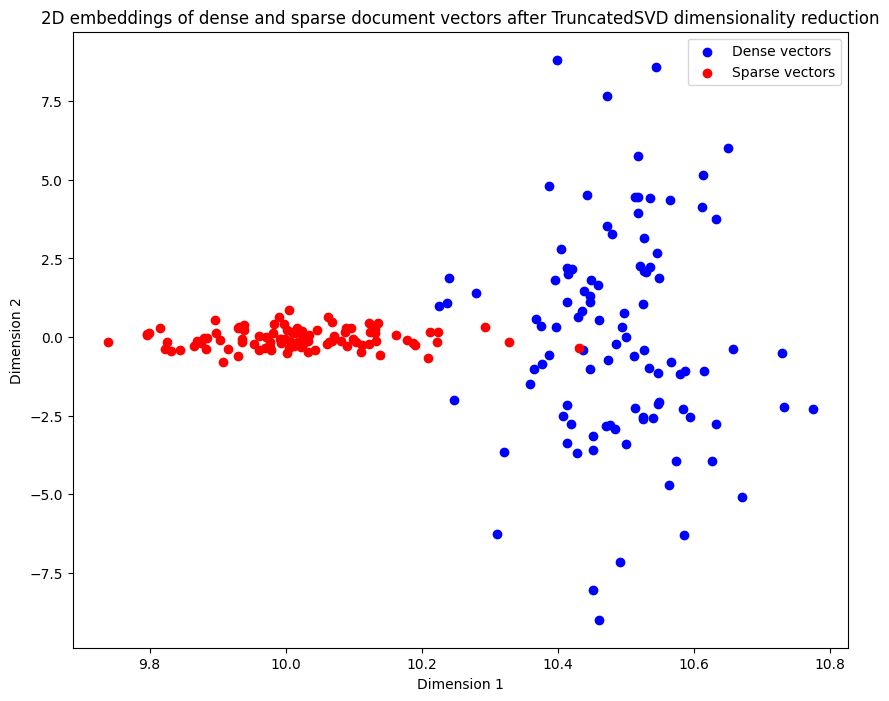

In [6]:
# 각각의 차원 축소 결과를 산점도 표시
fig, ax = plt.subplots(figsize=(10, 8)) 
ax.scatter(dense_vectors_svd[:, 0], dense_vectors_svd[:, 1], c='b', label='Dense vectors') 
ax.scatter(sparse_vectors_svd[:, 0], sparse_vectors_svd[:, 1], c='r', label='Sparse vectors') 
ax.set_title('2D embeddings of dense and sparse document vectors after TruncatedSVD dimensionality reduction')
ax.set_xlabel('Dimension 1') 
ax.set_ylabel('Dimension 2') 
ax.legend() 
plt.show()